<a href="https://colab.research.google.com/github/emilygreenawalt1/BrainTumorDetection/blob/main/EGBrainTumorDetection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brain Tumor Detection

Over 210,000 patients are diagnosed with brain cancer annually. However, there is significantly less awareness and funding dedicated to brain cancer compared to other cancers. The largest brain cancer foundation, The National Brain Tumor Society, accumulates about 9M US Dollars a year (with roughly 2M dedicated to research), compared to 400M for breast cancer via Komen and 40M from the Prostate Cancer Fountain. The majority of this brain cancer funding is dedicated towards Glioblastoma, the most aggressive brain tumor. This, however, has resulted in a scarcity of FDA-approved drugs, none of which have caused a meaningful difference in lifespan extension or overall treatment.
Due to this lack of research and funding, Artificial Intelligence (AI) can be a method to optimize developing technologies into the diagnosis and treatment for brain tumor patients, specifically in the preoperative stage. Before the patient undergoes surgery, AI can be a useful tool for brain tumor detection, diagnosis, and surgical planning- streamlining the workload for overworked medical professionals and providing a tool for more accurate analysis.


In [ ]:
#@title Dataset { display-mode: "form" }
import pandas as pd
import numpy as np

!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20%2B%20X/Group/Healthcare/Brain%20Tumor%20Detection/tumor.npy"
!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20%2B%20X/Group/Healthcare/Brain%20Tumor%20Detection/tumor_labels.npy"

### pre-loading all data of interest
image_data = np.load('tumor.npy')
labels = np.load('tumor_labels.npy')

tumor.npy.2         100%[===================>]  16.29M  --.-KB/s    in 0.1s    
tumor_labels.npy.2  100%[===================>]   2.10K  --.-KB/s    in 0s      


In [ ]:
#Importing Sklearn Libraries
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

**About the Dataset**

The dataset collected contains about 250 images of brain MRI scans. The dataset was split between images that did not contain a tumor, labeled ‘0’, and those containing a tumor, labeled ‘1’.

In [ ]:
#Preprocessed image data visualized below. 
image_data

array([[[[ 27,  27,  27],
         [ 27,  27,  27],
         [ 27,  27,  27],
         ...,
         [ 27,  27,  27],
         [ 27,  27,  27],
         [ 27,  27,  27]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0]],

        ...,

        [[ 19,  19,  19],
         [ 33,  33,  33],
         [  2,   2,   2],
         ...,
         [  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1]],

        [[  4,   4,   4],
         [  0,   0,   0],
         [  5,   5,   5],
         ...,
         [  1,   1,   1],
         [  1,   1,   1],
         [  1,   1,   1]],

        [[  0,   0,   0],
         [  0,   0,   0],
         [  0,   0,   0],
         ...,
         [  0,   0,   0],
        

In [ ]:
#Classification Labels, 1 meaning the image contains a tumor, 0 meaning the image does not.
print(labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


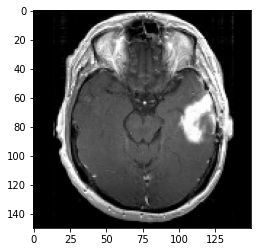

In [ ]:
#Raw image data
import matplotlib.pyplot as plt
plt.imshow(image_data[55])

To preprocess this image data, the images were converted into **grayscale**, using a function imported from *skimage*, an open source Python package used for image processing. After modifying the image to grayscale, the pixels then had to be normalized onto a binary scale. This ensures the pixel input parameters are relatively the same, preventing any bias in data distribution and training. The final pre-processed image dataset contained the dimensions of (253x150x150). 

Original: (253, 150, 150, 3)
Grayscale: (253, 150, 150)
(253, 150, 150)
[[0.10588235 0.10588235 0.10588235 ... 0.10588235 0.10588235 0.10588235]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.0745098  0.12941176 0.00784314 ... 0.00392157 0.00392157 0.00392157]
 [0.01568627 0.         0.01960784 ... 0.00392157 0.00392157 0.00392157]
 [0.         0.         0.         ... 0.         0.         0.        ]]


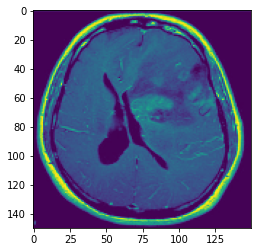

In [ ]:
# Data preprocessing 
image_data.shape
from skimage import color

# Convert to gray scale
gray_image = color.rgb2gray(image_data) 

#Print image v grayscale
print("Original:", image_data.shape)
print("Grayscale:", gray_image.shape) 

#Fixing pixel values (normalization)
def normalize_one_image(image):
  """
    This function takes in an image and returns the same image normalized on a 0 to 1 scale
  """

  return (image - np.min(image)) / (np.max(image) - np.min(image))
normal_gray = normalize_one_image(gray_image)

print(normal_gray.shape) #DATA X = NORMAL GRAY
#Pixel Value Check
print(normal_gray[0])
#Print new image
plt.imshow(normal_gray[0])





**Training and Testing Splitting**

The dataset was then reshaped and split into training and testing data. In machine learning, training data is used to teach the model, and testing data identifies the accuracy of this training. For this particular study, the testing size of the model was set to be 20 percent, making training 80 percent.


In [ ]:
#Labeling Data into X and Y variables

x = normal_gray
y = labels

nsamples, nx, ny = x.shape
x_reshape = x.reshape((nsamples,nx*ny))

print(x_reshape)
print(x_reshape.shape)

[[0.10588235 0.10588235 0.10588235 ... 0.         0.         0.        ]
 [0.05490196 0.05490196 0.05490196 ... 0.04313725 0.04313725 0.04313725]
 [0.97647059 0.19607843 0.01960784 ... 0.98431373 1.         0.99607843]
 ...
 [0.45882353 0.1372549  0.16862745 ... 0.36078431 0.36470588 0.54509804]
 [0.21792863 0.2552098  0.65585059 ... 0.05973294 0.05973294 0.05973294]
 [0.         0.         0.         ... 0.         0.         0.        ]]
(253, 22500)


In [ ]:
from sklearn.model_selection import train_test_split

#Training and Testing Split
x_train, x_test, y_train, y_test = train_test_split(x_reshape, y, test_size=0.2) # YOUR CODE HERE
print(f' x_train is {x_train.shape} and Y_train is {y_train.shape}' ) 
print(f' x_test is {x_test.shape} and y_test is {y_test.shape}' ) 

 x_train is (202, 22500) and Y_train is (202,)
 x_test is (51, 22500) and y_test is (51,)


**Logistic Regression and Ridge Classifier**

Logistic Regression and Ridge Classifier are forms of supervised machine learning that determine a specific relationship, or fit, between the independent and dependent variables. For this study, the logistic model was fitted on the training predictor and response variables of the dataset, which was the relationship between the image data and the binary outcome of predetermined input labels of ‘0’ (not containing a tumor) and ‘1’ (containing a tumor).

*Hyperparameters in this study:*
The hyperparameters of these models were tuned based on the model’s **L1 and L2 regularization methods.** Regularization simplifies the model and adds a penalty component to high-value regression, a way to prevent future overfitting (occurs when the complexity of the model is greater than the input data). L1, the Lasso, Least Absolute Shrinkage and Selection Operator, Regression adds a penalty that is equal to the absolute value of the magnitude of coefficients (see Figure 6). This may result in the elimination of coefficients, or values closer to zero (ideal). The aim of The Lasso solution is to minimize unneeded coefficients and increase efficiency and readability of the model. L2, or Ridge regression, aims to fix data with multicollinearity, when there are several independent variables. Lambda, the penalty term, is the square of the coefficient magnitudes and is controlled by changing values of alpha (see Figure 7), reducing coefficient magnitude. Through this, it reduces parameter size and prevents multicollinearity. Both of these parameters were tested to determine the highest accuracy within the given training set for logistic regression, while the Ridge Model consistently uses the L2.



Logistic Regression Model Accuracy: 88.24%
Logistic Regression Model Precision Score: 90.62%
Logistic Regression Model Recall Score: 90.62%
F1 Score: 90.62%


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


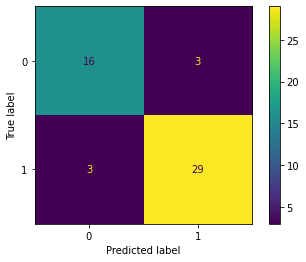

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


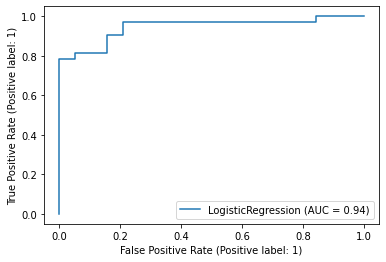

Area Under the Curve:
0.8741776315789473


In [ ]:
#Logistic Regression Model 
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(penalty='l2') #Hyperparameter penalty

logistic_model.fit(x_train, y_train)
predictions = logistic_model.predict(x_test)

#Accuracy 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

#Measuring Accuracy
score = accuracy_score(y_test, predictions)
print('Logistic Regression Model Accuracy: {:.2%}'.format(score)) #72.55% Accuracy L2, 84.31% None

precision = precision_score(y_test, predictions)
print('Logistic Regression Model Precision Score: {:.2%}'.format(precision)) #73.53%, 78.79 L2 None

recall = recall_score(y_test, predictions)
print('Logistic Regression Model Recall Score: {:.2%}'.format(recall)) #81.25 L2 None

f1 = f1_score(y_test, predictions)
print('F1 Score: {:.2%}'.format(f1)) #82.54 L2 None

conf_matrix = f1_score(y_test, predictions)
plot_confusion_matrix(logistic_model, x_test, y_test) 
plt.show()

roc_curve = f1_score(y_test, predictions)
plot_roc_curve(logistic_model, x_test, y_test) 
plt.show()

AUC = roc_auc_score(y_test, predictions) #what are x and y?
print('Area Under the Curve:'.format(AUC))
print(AUC)


Ridge Classifier Model Accuracy: 86.27%
Ridge Model Precision Score: 90.32%
Ridge Model Recall Score: 87.50%
F1 Score: 88.89%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


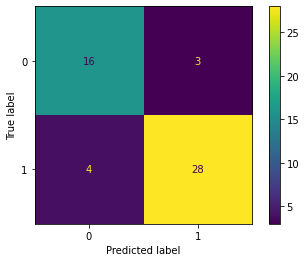

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


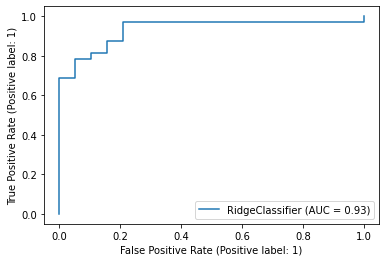

Area Under the Curve:
0.8585526315789473
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        19
           1       0.90      0.88      0.89        32

    accuracy                           0.86        51
   macro avg       0.85      0.86      0.85        51
weighted avg       0.86      0.86      0.86        51



In [ ]:
#Ridge Classifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import LassoCV

#Fitting Data into Model
ridge_classifier = RidgeClassifier()
ridge_classifier.fit(x_train, y_train)
predictions = ridge_classifier.predict(x_test)

#Measuring Accuracy 
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, predictions)
print('Ridge Classifier Model Accuracy: {:.2%}'.format(score)) #72.55%, then 82.35 CHANGE? Accuracy

precision = precision_score(y_test, predictions)
print('Ridge Model Precision Score: {:.2%}'.format(precision)) #86.49

recall = recall_score(y_test, predictions)
print('Ridge Model Recall Score: {:.2%}'.format(recall)) #83.87 L2 None

f1 = f1_score(y_test, predictions)
print('F1 Score: {:.2%}'.format(f1)) #88.24 L2 None

conf_matrix = f1_score(y_test, predictions)
plot_confusion_matrix(ridge_classifier, x_test, y_test) 
plt.show()

roc_curve = f1_score(y_test, predictions) #use f1 score?
plot_roc_curve(ridge_classifier, x_test, y_test) 
plt.show()

AUC = roc_auc_score(y_test, predictions) #what are x and y?
print('Area Under the Curve:'.format(AUC))
print(AUC)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))


**Decision Tree and Random Forest Classifier**

Decision Trees (DT) and Random Forest Classifier (RFC) are types of supervised machine learning that can be used for nonlinear classification or regression. The DT classifier develops a model through a tree, with each node testing a specific part of the dataset. The branches of the nodes correlate to the positive values of that specific quality. The RFC model is made up of multiple randomly created decision trees, or decision nodes, that split the data as the model is evaluated. The model seeks to find the best split to the data group from the multiple trees used simultaneously.

*Model development in this study:* The model was developed and preprocessed through a StandardScaler, a class imported from sklearn to standardize the dataset before feeding the data to the algorithm. This process is important to center and scale each feature of the dataset to ensure uniformity. Additionally, the data was decomposed through principal component analysis (PCA), reducing the linear dimensionality of the input features to decrease data size for a better machine learning performance. After the model was trained and tested, the model underwent hyperparameter tuning in the form of a **Grid-search**. This methodology is used to discover the best parameters of a model that determine the most accurate predictions. It was determined that the tuned DT parameters with the best predictions were a max depth (nodes from root to furthest leaf) of 3 and max features (maximum number of nodes) of 150. Both of the models were tested in this study to then determine which had the highest accuracy.



Decision Tree Model Accuracy: 84.31%
DT Model Precision Score: 90.00%
DT Recall Score: 84.38%
F1 Score: 87.10%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


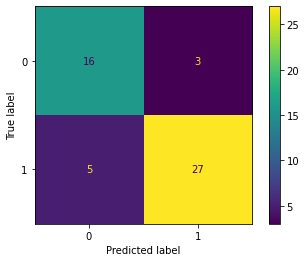

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


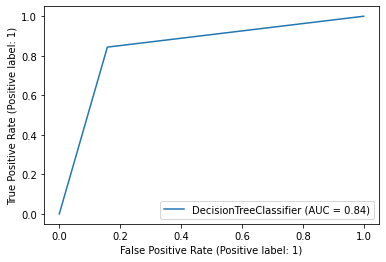

Area Under the Curve:
0.8429276315789473
Fitting 3 folds for each of 45 candidates, totalling 135 fits
Tuned Decision Tree Parameters: {'max_depth': 5, 'max_features': 150}
[1 1 0 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 0 1 1 1 0 1 1 0 1
 0 1 1 1 1 1 1 0 1 1 0 1 1 1]
              precision    recall  f1-score   support

           0       0.72      0.68      0.70        19
           1       0.82      0.84      0.83        32

    accuracy                           0.78        51
   macro avg       0.77      0.76      0.77        51
weighted avg       0.78      0.78      0.78        51



In [ ]:
#Decision Tree Model 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier()

dt_classifier.fit(x_train, y_train)
predictions = dt_classifier.predict(x_test)
std_slc = StandardScaler()
pca = decomposition.PCA()

#Measuring Accuracy 
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

score = accuracy_score(y_test, predictions)
print('Decision Tree Model Accuracy: {:.2%}'.format(score)) #78.43% Accuracy

precision = precision_score(y_test, predictions)
print('DT Model Precision Score: {:.2%}'.format(precision)) #81.08, then 70...


recall = recall_score(y_test, predictions)
print('DT Recall Score: {:.2%}'.format(recall)) #81.75.86 L2 None

f1 = f1_score(y_test, predictions)
print('F1 Score: {:.2%}'.format(f1)) #86.57 L2 None

conf_matrix = f1_score(y_test, predictions)
plot_confusion_matrix(dt_classifier, x_test, y_test) 
plt.show()

roc_curve = f1_score(y_test, predictions)
plot_roc_curve(dt_classifier, x_test, y_test) 
plt.show()

AUC = roc_auc_score(y_test, predictions) #what are x and y?
print('Area Under the Curve:'.format(AUC))
print(AUC)

# Necessary imports
from scipy.stats import randint

max_depth = [1,2,3,4,5]
max_features = [1,10,50,100,150,200,250,300,500]

# Creating the hyperparameter grid
param_dist = {"max_depth": max_depth,
			"max_features": max_features}
		#	"min_samples_leaf": randint(1, 9)}

grid_search = GridSearchCV(estimator= dt_classifier, param_grid= param_dist, #use pred?,
                              scoring='accuracy', n_jobs=-1, verbose = 1, cv = 3)

#estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False
grid_search.fit(x_train, y_train) #??

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(grid_search.best_params_))
tuned_dt_predict = grid_search.predict(x_test)
print(tuned_dt_predict)

from sklearn.metrics import classification_report
print(classification_report(y_test, tuned_dt_predict)) #CHANGE PREDICTIONS

RandomForestClassifier Model Accuracy: 86.27%
RFC Model Precision Score: 93.10%
RFC Model Recall Score: 84.38%
F1 Score: 88.52%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


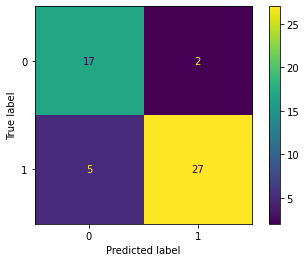

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


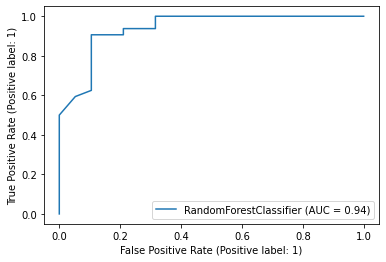

Area Under the Curve:
0.8692434210526316
              precision    recall  f1-score   support

           0       0.77      0.89      0.83        19
           1       0.93      0.84      0.89        32

    accuracy                           0.86        51
   macro avg       0.85      0.87      0.86        51
weighted avg       0.87      0.86      0.86        51



In [ ]:
#Random Forest Classifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()

rf_classifier.fit(x_train, y_train)
predictions = rf_classifier.predict(x_test)

#Accuracy 
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

score = accuracy_score(y_test, predictions)
print('RandomForestClassifier Model Accuracy: {:.2%}'.format(score)) #88.24%, 78.43 Accuracy

precision = precision_score(y_test, predictions)
print('RFC Model Precision Score: {:.2%}'.format(precision)) #77.78%


recall = recall_score(y_test, predictions)
print('RFC Model Recall Score: {:.2%}'.format(recall)) #82.76 L2 None

f1 = f1_score(y_test, predictions)
print('F1 Score: {:.2%}'.format(f1)) #92.54 L2 None

conf_matrix = f1_score(y_test, predictions)
plot_confusion_matrix(rf_classifier, x_test, y_test) 
plt.show()

roc_curve = f1_score(y_test, predictions)
plot_roc_curve(rf_classifier, x_test, y_test) 
plt.show()

AUC = roc_auc_score(y_test, predictions) #what are x and y?
print('Area Under the Curve:'.format(AUC))
print(AUC)

from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))



**Support Vector Classifier**

Support vector machine (SVM) models are supervised learning algorithms used for classification or regression. This model is typically used to classify two categories of input data at a fast and efficient rate. The algorithm plots each point of data in a dimensional plane, determined by the number of features the data contains. After the points are plotted on a hyperplane, the algorithm creates a line of separation between the two categories, intending to maximize the distance between the two classes and separate the data points accordingly. Data points in closest proximity to the hyperplane are known as support vectors, which help in determining the separating line. Key components of the SVM are Gamma, C, and Kernel. Gamma is how much weight a single training example has on the overall model, C determines the penalty of miscalculations (squared L2), and Kernel is the type of function the SVM utilizes.

*Model development in this study: C-Support Vector:* When tuning this model to achieve maximum efficiency for the MRI dataset, the Gamma, C, and Kernel parameters were taken into consideration, namely the C value. The gamma remained at the default value (‘scale’), and the kernel remained at Radial basis function (‘rbf’). RBF kernels are used for non-linear data that evaluates the similarity and proximity of points from a center, an area of maximum output. Distributing this data allows points relatively close to the desired center to have central power in deciding values, which limits the output power of data that is distant from this center. When conducting a **grid-search** to determine the **optimal parameter for C**, it was determined the value of 10 yielded the highest accuracy without overfitting the data.

SVC Model Accuracy: 78.43%
SVC Model Precision Score: 83.87%
SVC Model Recall Score: 81.25%
F1 Score: 82.54%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


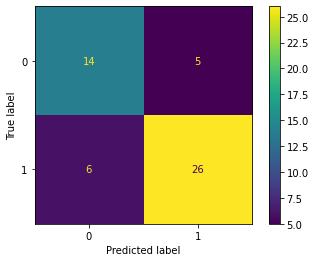

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


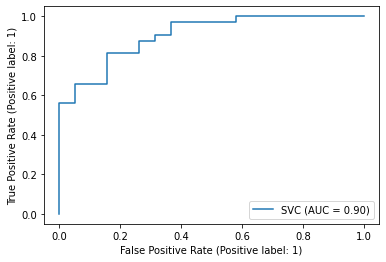

Area Under the Curve:
0.7746710526315791
Fitting 3 folds for each of 6 candidates, totalling 18 fits
Tuned SVC Parameters: {'C': 1}
[1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 1 1 0 1
 1 0 1 1 1 1 0 0 1 0 0 1 1 1]

Tuned
SVC Model Accuracy: 78.43%
SVC Model Precision Score: 83.87%
SVC Model Recall Score: 81.25%
F1 Score: 82.54%


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


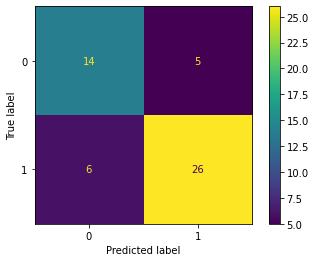

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


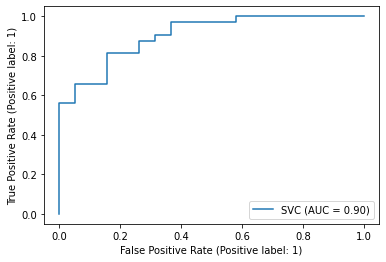

Area Under the Curve:
0.7746710526315791
              precision    recall  f1-score   support

           0       0.70      0.74      0.72        19
           1       0.84      0.81      0.83        32

    accuracy                           0.78        51
   macro avg       0.77      0.77      0.77        51
weighted avg       0.79      0.78      0.79        51



In [ ]:
#SVC Model 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
svc_classifier = SVC()

svc_classifier.fit(x_train, y_train)
predictions = svc_classifier.predict(x_test)

#Accuracy 
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, predictions)
print('SVC Model Accuracy: {:.2%}'.format(score)) #76.47%, 86.27 Accuracy

precision = precision_score(y_test, predictions)
print('SVC Model Precision Score: {:.2%}'.format(precision)) #80

recall = recall_score(y_test, predictions)
print('SVC Model Recall Score: {:.2%}'.format(recall)) #87.88 L2 None

f1 = f1_score(y_test, predictions)
print('F1 Score: {:.2%}'.format(f1)) #78.79 L2 None

conf_matrix = f1_score(y_test, predictions)
plot_confusion_matrix(svc_classifier, x_test, y_test) 
plt.show()

roc_curve = f1_score(y_test, predictions)
plot_roc_curve(svc_classifier, x_test, y_test) 
plt.show()

AUC = roc_auc_score(y_test, predictions) #what are x and y?
print('Area Under the Curve:'.format(AUC))
print(AUC)

# Necessary imports
from scipy.stats import randint

c_grid = [0.1, 1, 10,100,1000,1500]

# Creating the hyperparameter grid
param_dist = {"C": c_grid} #must recognize parameter
		#	"min_samples_leaf": randint(1, 9)}

grid_search = GridSearchCV(estimator= svc_classifier, param_grid= param_dist, #use pred?,
                              scoring='accuracy', n_jobs=-1, verbose = 1, cv = 3)

#estimator, param_grid, *, scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False
grid_search.fit(x_train, y_train) #??

# Print the tuned parameters and score
print("Tuned SVC Parameters: {}".format(grid_search.best_params_))
tuned_svc_predict = grid_search.predict(x_test)
print(tuned_svc_predict)

print()
print("Tuned")

score = accuracy_score(y_test, tuned_svc_predict)
print('SVC Model Accuracy: {:.2%}'.format(score)) #76.47%, 86.27 Accuracy

precision = precision_score(y_test, tuned_svc_predict)
print('SVC Model Precision Score: {:.2%}'.format(precision)) #80

recall = recall_score(y_test, tuned_svc_predict)
print('SVC Model Recall Score: {:.2%}'.format(recall)) #87.88 L2 None

f1 = f1_score(y_test, tuned_svc_predict)
print('F1 Score: {:.2%}'.format(f1)) #78.79 L2 None

conf_matrix = f1_score(y_test, tuned_svc_predict)
plot_confusion_matrix(svc_classifier, x_test, y_test) 
plt.show()

roc_curve = f1_score(y_test, tuned_svc_predict)
plot_roc_curve(svc_classifier, x_test, y_test) 
plt.show()

AUC = roc_auc_score(y_test, tuned_svc_predict) #what are x and y?
print('Area Under the Curve:'.format(AUC))
print(AUC)

from sklearn.metrics import classification_report
print(classification_report(y_test, tuned_svc_predict)) #CHANGE PREDICTIONS

**Convolutional Neural Network**

Convolutional neural networks (CNN) are a form of deep learning, a subset of machine learning. Deep learning utilizes algorithms to model the structure of a human brain using artificial neural networks. The CNN is most specifically used for object identification due to its ability to process pixel data effectively. CNN algorithms are composed of several different layers that are used for different areas of computation. These layers work together to learn how to detect features in an image, using kernels. Filters, or kernels, are added to each image, which is intended to increase its accuracy and detail after each layer to recognize features. The partially detected image then becomes the input for the successive layer until the fully connected layer, the last layer, recognizes the image.

*In this study:* For the particular CNN model in this study, a 39 layer neural network was constructed. To begin, the input data of the image was reshared and stored into an array before splitting into training and testing data. A Conv2D convolutional layer, used for spatial convolution over images, had parameters set for learning a total of 32 filters and Max Pooling to select the maximum element from the covered area of the filter. The aforementioned layers within the CNN architecture can be seen in Figure 8. For padding (the amount of additional layers added to input images during training), the value was set to ‘same’, which ensures the dimensions of the input data volume match the output. Additionally, the Rectified Linear Unit (ReLU) activation function was used, which will output only positive or zero values and stagger neuron activation, which creates better model performance. The loss function used was binary cross-entropy. The loss function evaluates model performance by comparing training and testing results of binary classification data, in this case whether the image contains a tumor or not. After these parameters were set, the 2-D array of image data was flattened into a linear vector to be used as input for the CNN. Then, a sequence of dense and dropout layers were used. The dense layers, deeply connected layers that receive information from preceding layers, were set to contain units (the size of output) of 64 or 128 with a ReLU activation function. Within these dense layers, dropout layers were added every 2 dense layers in an effort to prevent overfitting. Dropout layers randomly select neurons to ignore, or drop, before the input data is given to the following layer to reduce complexity. After these layers were added, the model was compiled using the Adam optimizer, an optimizer used during model training to modify learning rates, the binary cross entropy loss function, and the accuracy metric to measure performance.


In [ ]:
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Activation, MaxPooling2D, Dropout, Flatten, Reshape, Dense, Conv2D, GlobalAveragePooling2D
from keras.wrappers.scikit_learn import KerasClassifier
import keras.optimizers as optimizers
from keras.callbacks import ModelCheckpoint
monitor = ModelCheckpoint('./model.hdf5', 
                          monitor='val_accuracy', 
                          verbose=0, 
                          save_best_only=True, 
                          save_weights_only=False, 
                          mode='auto', 
                          save_freq='epoch')

#do not need to call dataframe, * array
x_reshape = np.reshape(x,(x.shape[0],x.shape[1],x.shape[2],1))
x_reshape = x_reshape.astype('float')

x_train, x_test, y_train, y_test = train_test_split(x_reshape, y, test_size=0.2) # YOUR CODE HERE

cnn = Sequential()
## Define number of layers and loss function
np.expand_dims(x_reshape, 2)
num_hidden_layers = 2 # reduced this (Raghav)
loss_fxn = 'binary_crossentropy'



cnn.add(Conv2D(32, (3, 3), padding = 'same')) #Convolution Layer
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2))) #Max-Pooling Layer

cnn.add(Conv2D(32, (3, 3), padding = 'same')) #Convolution Layer
cnn.add(Activation('relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2))) #Max-Pooling Layer

#cnn.add(Conv2D(32, (3, 3), padding = 'same')) #Convolution Layer
#cnn.add(Activation('relu'))
#cnn.add(MaxPooling2D(pool_size=(2, 2))) #Max-Pooling Layer

cnn.add(Flatten())

#Dense and Dropout Layers
cnn.add(Dense(units = 128, activation = 'relu'))
cnn.add(Dense(units = 64, activation = 'relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(units = 128, activation = 'relu'))
cnn.add(Dense(units = 64, activation = 'relu'))
cnn.add(Dropout(0.25))
cnn.add(Dense(units = 128, activation = 'relu'))
cnn.add(Dense(units = 64, activation = 'relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(units = 128, activation = 'relu'))
cnn.add(Dense(units = 64, activation = 'relu'))
cnn.add(Dropout(0.25))
cnn.add(Dense(units = 128, activation = 'relu'))
cnn.add(Dense(units = 64, activation = 'relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(units = 128, activation = 'relu'))
cnn.add(Dense(units = 64, activation = 'relu'))
cnn.add(Dropout(0.25))
cnn.add(Dense(units = 128, activation = 'relu'))
cnn.add(Dense(units = 64, activation = 'relu'))
cnn.add(Dropout(0.5))
cnn.add(Dropout(0.5))
cnn.add(Dropout(0.5))
cnn.add(Dense(units = 128, activation = 'relu'))
cnn.add(Dense(units = 64, activation = 'relu'))
cnn.add(Dropout(0.25))
cnn.add(Dropout(0.5))
cnn.add(Dense(units = 128, activation = 'relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(units = 64, activation = 'relu'))
cnn.add(Dense(units = 64, activation = 'relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(units = 128, activation = 'relu'))
cnn.add(Dropout(0.5))
cnn.add(Dropout(0.5))
cnn.add(Dense(units = 1, activation = 'sigmoid'))

cnn.compile(optimizer= 'adam', loss ='binary_crossentropy', metrics=['accuracy'])
cnn.fit(x_train, y_train, epochs=30, validation_data=(x_test,y_test), shuffle = True, callbacks=[monitor])


Epoch 1/30
7/7 [==============================] - 62s 836ms/step - loss: 0.6943 - accuracy: 0.5099 - val_loss: 0.6886 - val_accuracy: 0.5882
Epoch 2/30
7/7 [==============================] - 5s 754ms/step - loss: 0.6946 - accuracy: 0.5545 - val_loss: 0.6863 - val_accuracy: 0.5882
Epoch 3/30
7/7 [==============================] - 7s 923ms/step - loss: 0.6806 - accuracy: 0.6139 - val_loss: 0.6840 - val_accuracy: 0.5882
Epoch 4/30
7/7 [==============================] - 6s 898ms/step - loss: 0.6733 - accuracy: 0.5990 - val_loss: 0.6819 - val_accuracy: 0.5882
Epoch 5/30
7/7 [==============================] - 6s 788ms/step - loss: 0.6625 - accuracy: 0.6287 - val_loss: 0.6781 - val_accuracy: 0.5882
Epoch 6/30
7/7 [==============================] - 8s 1s/step - loss: 0.6648 - accuracy: 0.6040 - val_loss: 0.6752 - val_accuracy: 0.5882
Epoch 7/30
7/7 [==============================] - 5s 753ms/step - loss: 0.6442 - accuracy: 0.5990 - val_loss: 0.6731 - val_accuracy: 0.5882
Epoch 8/30
7/7 [======

**Conclusion**

Within this study, it is evident that AI could provide a significant benefit to medical research, specifically within the cancer screening and diagnosis realm. With models ranging from 78 to 92 percent accuracy for brain tumor detection, these results are an indicator of the possibility for future innovation with AI. Throughout the testing of predictive models, it is apparent that with high volume input data and parameter tuning, these sources of technology could provide increased efficiency within cancer treatment, especially within the pre operative process. Although answers in brain cancer are currently elusive, with the simplification of processes such as screening and detection, there is vast potential for advancements within this field that can provide patients with better future.